In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
#Get the stock quote 
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-07-01') 
#Show the data 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2020-06-25,365.000000,357.570007,360.700012,364.839996,34380600.0,364.839996
2020-06-26,365.320007,353.019989,364.410004,353.630005,51314200.0,353.630005
2020-06-29,362.170013,351.279999,353.250000,361.779999,32661500.0,361.779999


In [3]:
df.shape


(2138, 6)

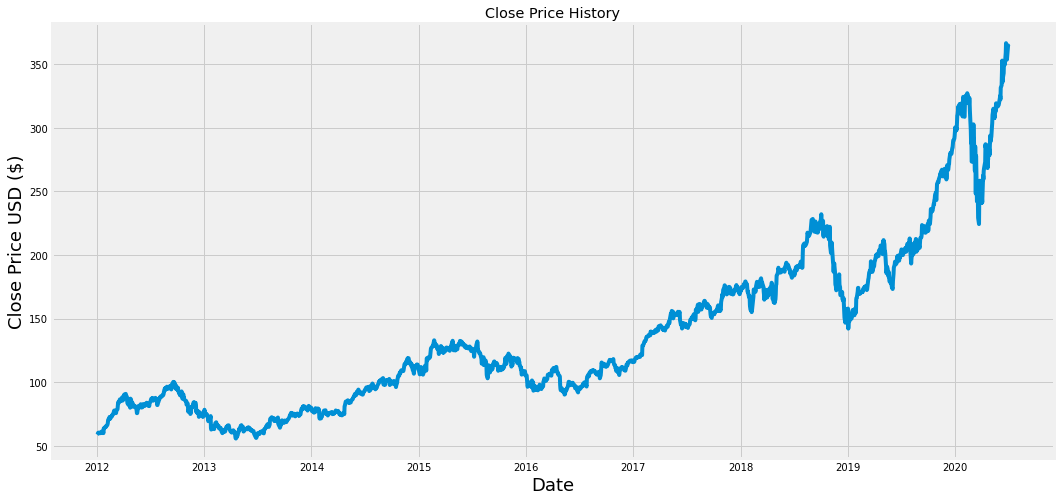

In [4]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [5]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 
training_data_len

1711

In [6]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[0.00951645],
       [0.01053246],
       [0.01264263],
       ...,
       [0.98471391],
       [0.99443261],
       [0.9922121 ]])

In [7]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
      print(x_train)
      print(y_train)


[array([0.00951645, 0.01053246, 0.01264263, 0.01465166, 0.01434364,
       0.01503783, 0.01472061, 0.01418732, 0.01346096, 0.01570904,
       0.01773646, 0.01711123, 0.01368622, 0.01695491, 0.01373679,
       0.02580476, 0.0248715 , 0.0260898 , 0.02872405, 0.03031932,
       0.030186  , 0.02969409, 0.03179047, 0.03376271, 0.03599702,
       0.03960592, 0.0471869 , 0.04730183, 0.05152218, 0.05467593,
       0.04925568, 0.05134287, 0.0513015 , 0.0571539 , 0.05632177,
       0.05786186, 0.06062945, 0.06216957, 0.06660598, 0.06983791,
       0.07077114, 0.07109757, 0.06557159, 0.06423835, 0.06443605,
       0.06963101, 0.07109297, 0.07423292, 0.08163462, 0.09150967,
       0.08966154, 0.08966613, 0.09680578, 0.09904007, 0.0974494 ,
       0.09599666, 0.09448414, 0.09950899, 0.102957  , 0.10440056])]
[0.10083302902752131]
[array([0.00951645, 0.01053246, 0.01264263, 0.01465166, 0.01434364,
       0.01503783, 0.01472061, 0.01418732, 0.01346096, 0.01570904,
       0.01773646, 0.01711123, 0.013

In [10]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [12]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [14]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1651/1651 [==============================] - 36s 22ms/step - loss: 4.9757e-04


In [16]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [17]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [18]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [20]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [21]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse


8.505411725538492

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


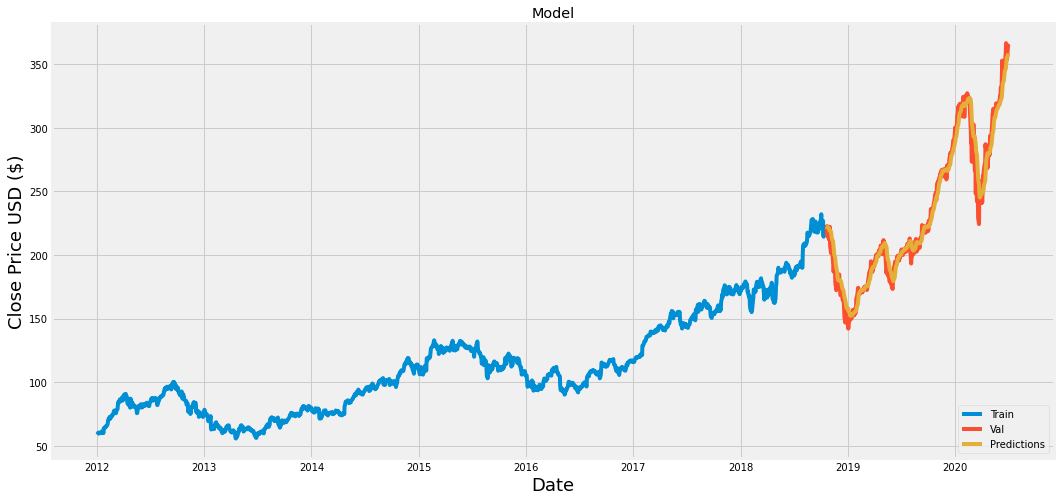

In [22]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [23]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-10-19,219.309998,222.370468
2018-10-22,220.649994,221.952759
2018-10-23,222.729996,221.832825
2018-10-24,215.089996,222.102020
2018-10-25,219.800003,221.704956
...,...,...
2020-06-25,364.839996,353.519318
2020-06-26,353.630005,355.749573
2020-06-29,361.779999,356.436768


In [24]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-07-30')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[376.3948]]


In [25]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2020-07-31')
print(apple_quote2['Close'])

Date
2019-12-18    279.739990
2019-12-19    280.019989
2019-12-20    279.440002
2019-12-23    284.000000
2019-12-24    284.269989
                 ...    
2020-07-27    379.239990
2020-07-28    373.010010
2020-07-29    380.160004
2020-07-30    384.760010
2020-07-31    425.040009
Name: Close, Length: 156, dtype: float64
